# CoinMarketAPI

### What is the CoinMarketCap API?

The CoinMarketCap API is a method to retrieve cryptocurrency data such as price, volume, market cap, and exchange data from CoinMarketCap using code.

The website of the CMC is free to use and the payment is necessary if you want more API functions.

CoinMarketCap API offers a free plan among the other 4 available ones. With the free plan you have access to the 9 market data endpoints:

Crypto referential and info logo and logo assets
- Latest Global Market cap, volume and stats

- Latest crypto rankings and market quotes

- Latest crypto and flat currency conversions

- Partner data access

The number of free CMC API call credits per month is 10k and, with the other paid packages, it can even go up to 3 million or more.

### Why should I use CoinMarketCap?
- Has a free plan
- Easy to use
- Informative
- Tracks a great number of coins and exchanges
- Has a mobile APP
- Good API

### How to get started with CoinMarketCap API?
In order to get started with the CoinMarketCap API you’ll need to obtain your API key from the following link:

https://coinmarketcap.com/api/

For this tutorial we’ll be using Python, so let’s go over and install the CoinMarketCap library with the following command:

`pip install python-coinmarketcap`

The main cryptocurrency endpoints that the CMC offers us are the following:

- Metadata
- Historical listings
- Historical quotes
- Historical OHLCV
- CMC ID Map
- Latest Quotes
- Latest Listings
- Latest Market Pairs
- Latest OHLCV
- Price performance stats

import the CMC library and set the client up.

In [1]:
ApiKey= "YourAPIKey"
from coinmarketcapapi import CoinMarketCapAPI, CoinMarketCapAPIError
cmc = CoinMarketCapAPI(ApiKey)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import json
from IPython.core.display import HTML
import requests

### How to get the ID Map data with CoinMarketCap API?

The CMC ID Map endpoint obtains a mapping of all currencies with their unique ID’s. Each currency obtained by this endpoint will return standard identifiers as name, symbol and token address.

The data obtained will provide the first and last historical data timestamps

In [3]:
data_id_map= cmc.cryptocurrency_map()
#data_id_map

Make the data more readable by putting it into a pandas data frame. For this, you need to do the following:

In [4]:
data_id_map_pd = pd.DataFrame(data_id_map.data, columns =['name','symbol'])
#pd.set_index('symbol',inplace=True)
#print(data_id_map_pd)

### How to get quote data using CoinMarketCap API?
The CMC quote data endpoint returns the latest market quote for a specified cryptocurrency. Moreover, we can convert this data easily into a wanted currency.

In [5]:
data_quote = cmc.cryptocurrency_quotes_latest(symbol='ETH', convert='USD')
#data_quote.data

##By using url
#var url=https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest?symbol=ETH

Make the data more readable by json normalizing

In [6]:
jsondata= pd.json_normalize(data_quote.data)
jsondata.T
#data_quote_pd= pd.DataFrame(data_quote.data['ETH'],columns=data_quote.data['ETH'].keys())

,0
ETH.id,1027
ETH.name,Ethereum
ETH.symbol,ETH
ETH.slug,ethereum
ETH.num_market_pairs,4663
ETH.date_added,2015-08-07T00:00:00.000Z
ETH.tags,"[mineable, pow, smart-contracts, ethereum-ecos..."
ETH.max_supply,None
ETH.circulating_supply,118448194.624
ETH.total_supply,118448194.624


### How to get the latest listing data using CoinMarketCap API

The CMC latest listings endpoint obtains a list of all active cryptocurrencies with their latest market data.



In [7]:
data_latest = cmc.cryptocurrency_listings_latest()
#data_latest.data
#url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

#### Creating lists for some data points

In [30]:
names= [i['name'] for i in data_latest.data]
#names
symbols= [i['symbol'] for i in data_latest.data]
#symbols
#slugs= [i['slug'] for i in data_latest.data]
#slug
#num_market_pairs= [i['num_market_pairs'] for i in data_latest.data]
#num_market_pairs
date_added= [i['date_added'] for i in data_latest.data]
#date_added
cmc_ranks= [i['cmc_rank'] for i in data_latest.data]
#cmc_ranks
total_supply= [i['total_supply'] for i in data_latest.data]
#cmc_ranks
last_updated= [i['last_updated'] for i in data_latest.data]
#cmc_ranks
quote_prices=[i['quote']['USD']['price'] for i in data_latest.data]

volume_24h=[i['quote']['USD']['volume_24h'] for i in data_latest.data]

volume_change_1h=[i['quote']['USD']['percent_change_1h'] for i in data_latest.data]

volume_change_24h=[i['quote']['USD']['percent_change_24h'] for i in data_latest.data]

volume_change_7d=[i['quote']['USD']['percent_change_7d'] for i in data_latest.data]

volume_change_30d=[i['quote']['USD']['percent_change_30d'] for i in data_latest.data]

volume_change_60d=[i['quote']['USD']['percent_change_60d'] for i in data_latest.data]

volume_change_90d=[i['quote']['USD']['percent_change_90d'] for i in data_latest.data]

market_cap=[i['quote']['USD']['market_cap'] for i in data_latest.data]

market_cap_dominance = [i['quote']['USD']['market_cap_dominance'] for i in data_latest.data]

#### Creating dataFrame from the selected lists

In [31]:
df= pd.DataFrame({'name':names,'symbol':symbols,'date_added':date_added,
                 'cmc_rank':cmc_ranks,'total_supply':total_supply,'last_updated':last_updated,'price':quote_prices,'volume_24h':volume_24h,
                  'volume_change_1h':volume_change_1h,'volume_change_24h':volume_change_24h,'volume_change_7d':volume_change_7d,
                 'volume_change_30d':volume_change_30d,'volume_change_60d':volume_change_60d,'volume_change_90d':volume_change_90d,
                 'market_cap':market_cap,'market_cap_dominance':market_cap_dominance})
df.head()

,name,symbol,date_added,cmc_rank,total_supply,last_updated,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance
0,Bitcoin,BTC,2013-04-28T00:00:00.000Z,1,1.888049e+07,2021-11-22T21:03:02.000Z,55679.840404,3.427421e+10,-0.925200,-6.617938,-12.517079,-8.880582,24.443892,15.183856,1.051263e+12,41.7279
1,Ethereum,ETH,2015-08-07T00:00:00.000Z,2,1.184482e+08,2021-11-22T21:03:02.000Z,4048.121169,1.903440e+10,-0.601806,-7.678244,-11.166162,-1.095881,28.645751,25.819435,4.794926e+11,19.0670
2,Binance Coin,BNB,2017-07-25T00:00:00.000Z,3,1.668011e+08,2021-11-22T21:02:09.000Z,554.706317,2.229108e+09,-0.443117,-6.583459,-12.328442,14.958956,45.231149,15.761485,9.252565e+10,3.6793
3,Tether,USDT,2015-02-25T00:00:00.000Z,4,7.635705e+10,2021-11-22T21:02:10.000Z,0.999984,7.886657e+10,-0.059979,-0.077973,-0.016386,-0.022629,-0.034371,-0.044231,7.308538e+10,2.9054
4,Solana,SOL,2020-04-10T00:00:00.000Z,5,5.095998e+08,2021-11-22T21:03:05.000Z,214.211263,3.427819e+09,0.240399,-8.809307,-8.884696,8.967732,43.912483,195.163600,6.507267e+10,2.5890


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  100 non-null    object 
 1   symbol                100 non-null    object 
 2   date_added            100 non-null    object 
 3   cmc_rank              100 non-null    int64  
 4   total_supply          100 non-null    float64
 5   last_updated          100 non-null    object 
 6   price                 100 non-null    float64
 7   volume_24h            100 non-null    float64
 8   volume_change_1h      100 non-null    float64
 9   volume_change_24h     100 non-null    float64
 10  volume_change_7d      100 non-null    float64
 11  volume_change_30d     100 non-null    float64
 12  volume_change_60d     100 non-null    float64
 13  volume_change_90d     100 non-null    float64
 14  market_cap            100 non-null    float64
 15  market_cap_dominance  10

In [33]:
print("\nMissing Values", df.isnull().any())
print("\nUnique Values ", df.nunique())


Missing Values name                    False
symbol                  False
date_added              False
cmc_rank                False
total_supply            False
last_updated            False
price                   False
volume_24h              False
volume_change_1h        False
volume_change_24h       False
volume_change_7d        False
volume_change_30d       False
volume_change_60d       False
volume_change_90d       False
market_cap              False
market_cap_dominance    False
dtype: bool

Unique Values  name                    100
symbol                  100
date_added               97
cmc_rank                100
total_supply             91
last_updated             11
price                   100
volume_24h              100
volume_change_1h        100
volume_change_24h       100
volume_change_7d        100
volume_change_30d       100
volume_change_60d       100
volume_change_90d       100
market_cap              100
market_cap_dominance     99
dtype: int64


In [34]:
df.describe()

,cmc_rank,total_supply,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance
count,100.000000,1.000000e+02,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000
mean,50.500000,6.109343e+12,2097.523027,2.031307e+09,-0.319450,-4.490032,-2.227893,28.895367,53.559043,84.893545,2.423381e+10,0.962762
std,29.011492,5.898261e+13,9967.093258,8.714266e+09,1.288495,6.726783,32.090706,99.312446,129.918664,272.923006,1.149664e+11,4.564816
min,1.000000,3.666600e+04,0.000043,2.713623e+06,-2.864493,-14.565329,-23.460900,-36.414437,-37.043644,-44.450565,1.111115e+09,0.044200
25%,25.750000,1.601622e+08,0.999531,1.166828e+08,-0.781343,-8.246585,-14.909170,-11.273688,-6.287449,-14.251959,1.776052e+09,0.070600
50%,50.500000,1.000000e+09,5.349229,3.282031e+08,-0.473763,-6.258046,-11.620831,-1.130680,7.754431,13.143768,3.525966e+09,0.140100
75%,75.250000,9.719593e+09,49.305205,8.825209e+08,-0.169416,-3.415055,-1.436473,12.449534,45.541578,62.490901,7.819637e+09,0.310775
max,100.000000,5.897373e+14,55967.194407,7.886657e+10,8.567342,37.463950,245.503589,524.110177,739.964636,2137.779593,1.051263e+12,41.727900


#### Changing tot datetime format

In [35]:
df["date_added"]=pd.to_datetime(df["date_added"]).dt.tz_localize(None)
df["last_updated"]=pd.to_datetime(df["last_updated"]).dt.tz_localize(None)
df.index

RangeIndex(start=0, stop=100, step=1)

#### Setting `symbol` as index

In [36]:
#df=df.set_index(['last_updated']) 
df.set_index('symbol',inplace=True)


In [37]:
df.head()

,name,date_added,cmc_rank,total_supply,last_updated,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance
symbol,,,,,,,,,,,,,,,
BTC,Bitcoin,2013-04-28,1,1.888049e+07,2021-11-22 21:03:02,55679.840404,3.427421e+10,-0.925200,-6.617938,-12.517079,-8.880582,24.443892,15.183856,1.051263e+12,41.7279
ETH,Ethereum,2015-08-07,2,1.184482e+08,2021-11-22 21:03:02,4048.121169,1.903440e+10,-0.601806,-7.678244,-11.166162,-1.095881,28.645751,25.819435,4.794926e+11,19.0670
BNB,Binance Coin,2017-07-25,3,1.668011e+08,2021-11-22 21:02:09,554.706317,2.229108e+09,-0.443117,-6.583459,-12.328442,14.958956,45.231149,15.761485,9.252565e+10,3.6793
USDT,Tether,2015-02-25,4,7.635705e+10,2021-11-22 21:02:10,0.999984,7.886657e+10,-0.059979,-0.077973,-0.016386,-0.022629,-0.034371,-0.044231,7.308538e+10,2.9054
SOL,Solana,2020-04-10,5,5.095998e+08,2021-11-22 21:03:05,214.211263,3.427819e+09,0.240399,-8.809307,-8.884696,8.967732,43.912483,195.163600,6.507267e+10,2.5890


#### How big is Bitcoin compared with the rest of the cryptocurrencies?

#### Creating `symbols` list

In [38]:
sym_list1 = ','.join(symbols)
sym_list1

'BTC,ETH,BNB,USDT,SOL,ADA,XRP,DOT,USDC,AVAX,DOGE,SHIB,CRO,LUNA,LTC,WBTC,BUSD,UNI,LINK,ALGO,MATIC,BCH,EGLD,XLM,VET,AXS,ICP,TRX,UST,MANA,ATOM,FTT,FIL,DAI,THETA,ETC,BTCB,HBAR,NEAR,FTM,XTZ,HNT,SAND,FLOW,XMR,GRT,MIOTA,EOS,KLAY,CAKE,AAVE,LRC,LEO,XEC,ONE,BSV,ENJ,KSM,MKR,NEO,STX,GALA,RUNE,ZEC,QNT,KDA,CHZ,WAVES,HOT,BTT,AMP,DASH,AR,CELO,KCS,IOTX,CRV,COMP,TFUEL,HT,NEXO,XEM,BAT,ICX,QTUM,DCR,OKB,VGX,WAXP,IMX,MINA,OMG,TUSD,ROSE,ZEN,SCRT,RVN,YFI,REV,XDC'

#### Now, let’s make a call that will provide is with the overall data for all  symbols cryptocurrency.

In [39]:
data1 = cmc.cryptocurrency_info(symbol=sym_list1)

In [40]:
#data1.data

#### Let's amke a dataframe for data1

In [41]:
df2 = pd.DataFrame(data1.data).T
df2

,id,name,symbol,category,description,slug,logo,subreddit,notice,tags,...,tag-groups,urls,platform,date_added,twitter_username,is_hidden,date_launched,contract_address,self_reported_circulating_supply,self_reported_tags
AAVE,7278,Aave,AAVE,token,Aave (AAVE) is a cryptocurrency and operates o...,aave,https://s2.coinmarketcap.com/static/img/coins/...,Aave_Official,[LEND](https://coinmarketcap.com/currencies/aa...,"[defi, dao, yield-farming, binance-smart-chain...",...,"[PROPERTY, PROPERTY, PROPERTY, PROPERTY, PROPE...","{'website': ['https://aave.com/', 'https://eth...","{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",2020-10-02T00:00:00.000Z,AaveAave,0,None,[{'contract_address': '0x7Fc66500c84A76Ad7e9c9...,None,None
ADA,2010,Cardano,ADA,coin,Cardano (ADA) is a cryptocurrency launched in ...,cardano,https://s2.coinmarketcap.com/static/img/coins/...,cardano,,"[mineable, dpos, pos, platform, research, smar...",...,"[OTHER, CONSENSUS_ALGORITHM, CONSENSUS_ALGORIT...","{'website': ['https://www.cardano.org'], 'twit...",None,2017-10-01T00:00:00.000Z,cardano,0,2017-09-01T00:00:00.000Z,[{'contract_address': '0x3ee2200efb3400fabb9aa...,None,[Communications & Social Media]
ALGO,4030,Algorand,ALGO,coin,Algorand (ALGO) is a cryptocurrency . Algorand...,algorand,https://s2.coinmarketcap.com/static/img/coins/...,AlgorandOfficial,,"[pos, platform, research, smart-contracts, arr...",...,"[CONSENSUS_ALGORITHM, PROPERTY, PROPERTY, PROP...","{'website': ['http://algorand.foundation', 'ht...",None,2019-06-20T00:00:00.000Z,AlgoFoundation,0,None,[],None,None
AMP,6945,Amp,AMP,token,Amp (AMP) is a cryptocurrency launched in 2020...,amp,https://s2.coinmarketcap.com/static/img/coins/...,amptoken,,None,...,None,"{'website': ['https://amptoken.org'], 'twitter...","{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",2020-09-08T00:00:00.000Z,amptoken,0,2020-09-08T00:00:00.000Z,[{'contract_address': '0xff20817765cb7f73d4bde...,36271610691,None
AR,5632,Arweave,AR,coin,Arweave (AR) is a cryptocurrency launched in 2...,arweave,https://s2.coinmarketcap.com/static/img/coins/...,Arweave,,"[distributed-computing, filesharing, storage, ...",...,"[PROPERTY, PROPERTY, PROPERTY, PROPERTY, PROPE...","{'website': ['https://www.arweave.org'], 'twit...",None,2020-05-27T00:00:00.000Z,arweaveteam,0,2018-07-13T00:00:00.000Z,[],None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRP,52,XRP,XRP,coin,XRP (XRP) is a cryptocurrency . XRP has a curr...,xrp,https://s2.coinmarketcap.com/static/img/coins/...,ripple,,"[medium-of-exchange, enterprise-solutions, bin...",...,"[PROPERTY, PROPERTY, PLATFORM, PROPERTY, PROPE...","{'website': ['https://xrpl.org/'], 'twitter': ...",None,2013-08-04T00:00:00.000Z,Ripple,0,None,[{'contract_address': '0x1d2f0da169ceb9fc7b314...,None,None
XTZ,2011,Tezos,XTZ,coin,Tezos (XTZ) is a cryptocurrency . Tezos has a ...,tezos,https://s2.coinmarketcap.com/static/img/coins/...,tezos,,"[pos, platform, enterprise-solutions, collecti...",...,"[CONSENSUS_ALGORITHM, PROPERTY, PROPERTY, PROP...","{'website': ['https://www.tezos.com/'], 'twitt...",None,2017-10-06T00:00:00.000Z,tezos,0,None,[{'contract_address': '0x16939ef78684453bfdfb4...,None,None
YFI,5864,yearn.finance,YFI,token,yearn.finance (YFI) is a cryptocurrency and op...,yearn-finance,https://s2.coinmarketcap.com/static/img/coins/...,,,"[defi, yield-farming, binance-smart-chain, yie...",...,"[PROPERTY, PROPERTY, PROPERTY, PROPERTY, PROPE...","{'website': ['https://yearn.finance/'], 'twitt...","{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",2020-07-18T00:00:00.000Z,iearnfinance,0,None,[{'contract_address': '0x0bc529c00c6401aef6d22...,None,None
ZEC,1437,Zcash,ZEC,coin,Zcash (ZEC) is a cryptocurrency . Users are ab...,zcash,https://s2.coinmarketcap.com/static/img/coins/...,zec,,"[mineable, pow, equihash, medium-of-exchange, ...",...,"[OTHER, CONSENSUS_ALGORITHM, CONSENSUS_ALGORIT...","{'website': ['https://z.cash/'], 'twitter': ['...",None,2016-10-29T00:00:00.0

In [42]:
df2['name']

AAVE             Aave
ADA           Cardano
ALGO         Algorand
AMP               Amp
AR            Arweave
            ...      
XRP               XRP
XTZ             Tezos
YFI     yearn.finance
ZEC             Zcash
ZEN           Horizen
Name: name, Length: 100, dtype: object

####  Create dataframe with selected columns and merge them with latest data of dataframe

In [43]:
df2 = df2[['id','name','description','logo','urls','twitter_username']]

In [44]:
df = df.merge(df2,on='name')

#### Write a function to convert a dataframe to html table to get the logo iamge

In [45]:
def image_to_html(link):
    return '<img src='+link+'>'
df1 = HTML(df.to_html(escape=False,formatters=dict(logo=image_to_html)))

In [46]:
df

,name,date_added,cmc_rank,total_supply,last_updated,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance,id,description,logo,urls,twitter_username
0,Bitcoin,2013-04-28,1,1.888049e+07,2021-11-22 21:03:02,55679.840404,3.427421e+10,-0.925200,-6.617938,-12.517079,-8.880582,24.443892,15.183856,1.051263e+12,41.7279,1,Bitcoin (BTC) is a cryptocurrency . Users are ...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://bitcoin.org/'], 'twitter...",
1,Ethereum,2015-08-07,2,1.184482e+08,2021-11-22 21:03:02,4048.121169,1.903440e+10,-0.601806,-7.678244,-11.166162,-1.095881,28.645751,25.819435,4.794926e+11,19.0670,1027,Ethereum (ETH) is a cryptocurrency . Users are...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://www.ethereum.org/', 'htt...",ethereum
2,Binance Coin,2017-07-25,3,1.668011e+08,2021-11-22 21:02:09,554.706317,2.229108e+09,-0.443117,-6.583459,-12.328442,14.958956,45.231149,15.761485,9.252565e+10,3.6793,1839,Binance Coin (BNB) is a cryptocurrency . Binan...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://www.binance.com/'], 'twi...",binance
3,Tether,2015-02-25,4,7.635705e+10,2021-11-22 21:02:10,0.999984,7.886657e+10,-0.059979,-0.077973,-0.016386,-0.022629,-0.034371,-0.044231,7.308538e+10,2.9054,825,Tether (USDT) is a cryptocurrency and operates...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://tether.to'], 'twitter': ...",tether_to
4,Solana,2020-04-10,5,5.095998e+08,2021-11-22 21:03:05,214.211263,3.427819e+09,0.240399,-8.809307,-8.884696,8.967732,43.912483,195.163600,6.507267e+10,2.5890,5426,Solana (SOL) is a cryptocurrency launched in 2...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://solana.com'], 'twitter':...",solana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Secret,2020-05-19,96,1.901651e+08,2021-11-22 21:03:06,7.733835,2.237704e+07,0.288944,0.427536,6.131810,25.405933,267.529443,358.560572,1.158650e+09,0.0461,5604,Secret (SCRT) is a cryptocurrency launched in ...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://scrt.network'], 'twitter...",secretnetwork
96,Ravencoin,2018-03-10,97,1.014400e+10,2021-11-22 21:03:07,0.113269,5.382853e+07,-0.509195,-7.648651,-8.960315,-6.592272,6.774464,-18.030226,1.149001e+09,0.0456,2577,Ravencoin (RVN) is a cryptocurrency launched i...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://ravencoin.org/', 'https:...",ravencoin
97,yearn.finance,2020-07-18,98,3.666600e+04,2021-11-22 21:02:09,30677.293693,2.107633e+08,-0.701588,-4.862864,-8.667264,-13.843675,-1.415633,-19.048976,1.123946e+09,0.0446,5864,yearn.finance (YFI) is a cryptocurrency and op...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://yearn.finance/'], 'twitt...",iearnfinance
98,Revain,2017-11-01,99,8.506149e+10,2021-11-22 21:03:03,0.013128,2.713623e+06,-0.828098,-0.897079,-15.747370,-24.337215,-33.398636,22.510855,1.116699e+09,0.0444,2135,Revain (REV) is a cryptocurrency and operates ...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://revain.org/', 'https://c...",revain_org


In [47]:
df.set_index('name',inplace=True)

### Top 10 coins with maraket capitalizationratio

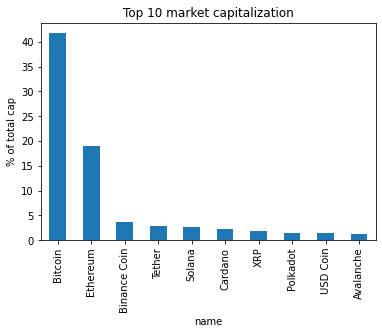

In [48]:
#Plotting the barplot with the title defined above 
ax = df['market_cap_dominance'][:10].plot.bar()
# Annotating the y axis with the label defined above
ax.set( title = 'Top 10 market capitalization' , ylabel='% of total cap');


### Top10 coins ratio of total_volume_24h_perc

In [49]:
# Calculating total price
df['total_volume_24h_perc'] = (df['volume_24h']/ df.volume_24h.sum()) *100
df['total_volume_24h_perc'] 

name
Bitcoin          16.872988
Ethereum          9.370519
Binance Coin      1.097376
Tether           38.825534
Solana            1.687495
                   ...    
Secret            0.011016
Ravencoin         0.026499
yearn.finance     0.103757
Revain            0.001336
XDC Network       0.002161
Name: total_volume_24h_perc, Length: 100, dtype: float64

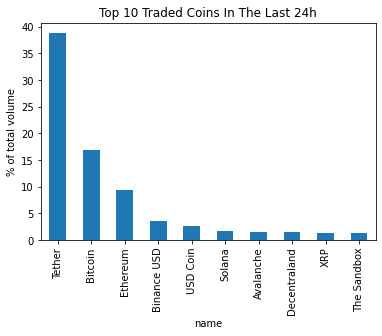

In [50]:
#Plotting the barplot with the title defined above 
ax = df['total_volume_24h_perc'].sort_values(ascending=False)[:10].plot.bar()
# Annotating the y axis with the label defined above
ax.set( title = 'Top 10 Traded Coins In The Last 24h' , ylabel='% of total volume');

#### Volatility in cryptocurrencies

The cryptocurrencies market has been spectacularly volatile since the first exchange opened.Let's explore this volatility a bit more! We will begin by selecting and plotting the  percentage changes from 1hr to 90 days, which we already have available.

In [53]:
# Selecting the name, volume_change_24h and volume_change_7d columns
volatility = df[['volume_change_1h', 'volume_change_24h','volume_change_7d','volume_change_30d', 'volume_change_60d','volume_change_90d']]

# Setting the index to 'name' and dropping all NaN rows 
#volatility = volatility.set_index("name") 
volatility = volatility.dropna()

# Sorting the DataFrame by volume_change_24h in ascending order
volatility = volatility.sort_values(by = "volume_change_24h" , ascending = True)


# Checking the first few rows
volatility.head(10)

,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d
name,,,,,,
IoTeX,-0.589647,-14.565329,-7.722698,177.342360,224.872360,146.154674
Arweave,-0.311919,-11.407730,-10.954167,12.424160,8.734397,100.365505
KuCoin Token,-0.720927,-10.666662,-12.774149,44.128127,104.346088,70.771130
Crypto.com Coin,0.342571,-10.416076,59.546759,272.158743,319.298010,358.676068
Zcash,-0.184392,-9.986456,2.513393,16.853963,62.548793,25.410004
Immutable X,-1.032955,-9.853547,22.843119,0.000000,0.000000,0.000000
THETA,-0.775858,-9.837829,-6.813053,-1.165478,9.911765,-11.386885
Harmony,-0.478004,-9.564299,-3.183654,4.409860,76.459976,155.108615
VeChain,-0.595640,-9.365012,-23.460900,-7.858272,23.189948,-1.104870


#### Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.

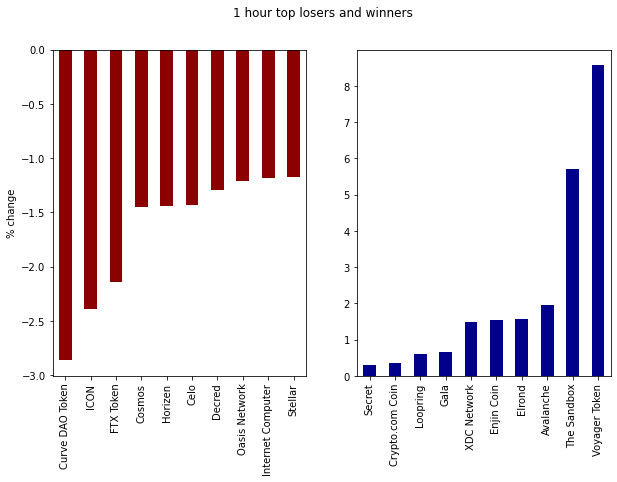

In [54]:
# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_1h.sort_values()[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "1 hour top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_1h.sort_values()[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("");


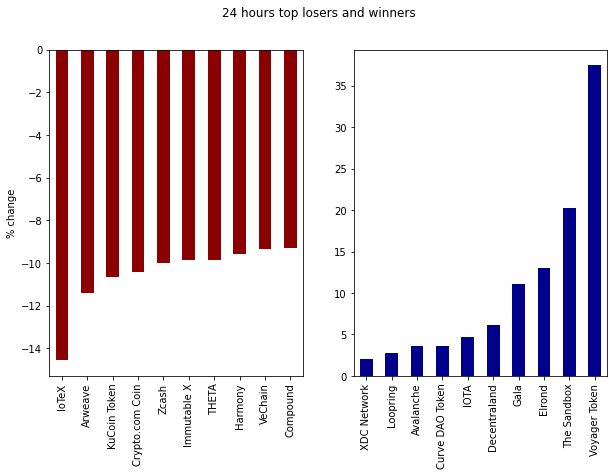

In [55]:
# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_24h[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "24 hours top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_24h[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("");

    
    

#### Lets check for  weekly 

Text(0.5, 0, '')

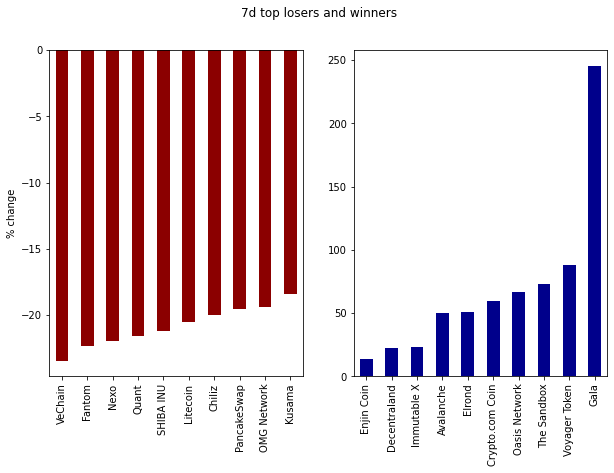

In [56]:
# Sorting the DataFrame by volume_change_24h in ascending order
volatility7d = volatility.sort_values(by = "volume_change_7d" , ascending = True)

# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_7d.sort_values()[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "7d top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_7d.sort_values()[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("")

**Top Gainers and Losers for 30 days**

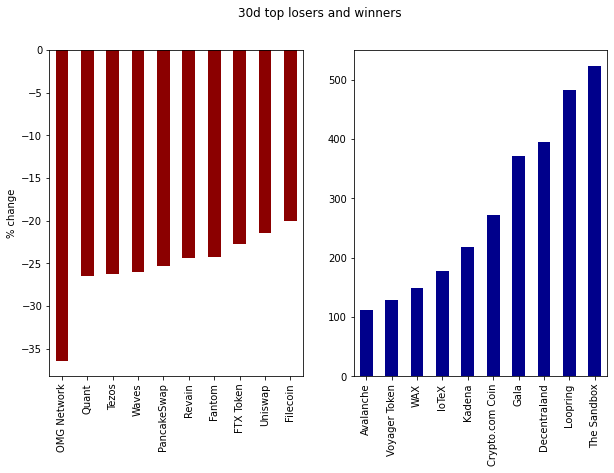

In [57]:


# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_30d.sort_values()[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "30d top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_30d.sort_values()[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("");

**Top Gainers and Losers for 60 days**

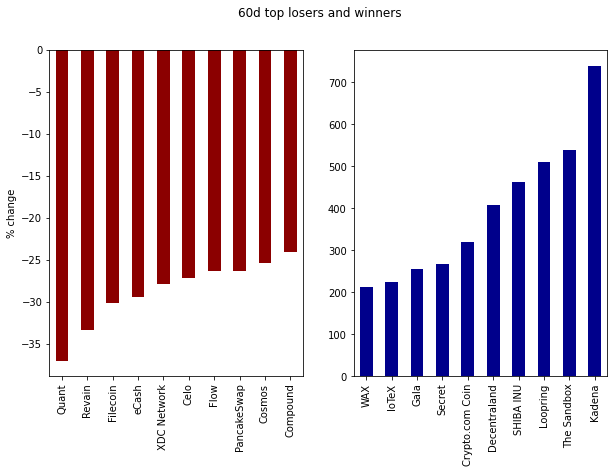

In [58]:

# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_60d.sort_values()[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "60d top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_60d.sort_values()[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("");

#### Lets check for 90days

Text(0.5, 0, '')

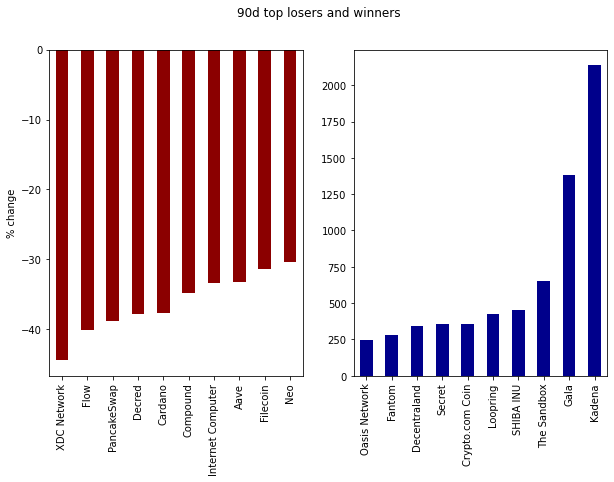

In [59]:
# Sorting the DataFrame by volume_change_24h in ascending order
volatility90d = volatility.sort_values(by = "volume_change_90d" , ascending = True)

# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_90d.sort_values()[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "90d top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_90d.sort_values()[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("")

<AxesSubplot:>

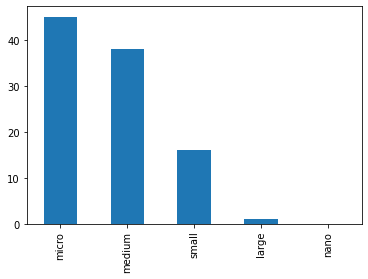

In [60]:
# counting different marketcaps from the the range of
bins = [50000000,300000000,3000000000,5000000000,1000000000000,1500000000000]
# Labels for the plot
labels = ['nano','micro','small','medium','large']
df['cap'] = pd.cut(df['market_cap'],bins,labels=labels)
df['cap'].value_counts().plot(kind='bar')

In [61]:
df

,date_added,cmc_rank,total_supply,last_updated,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,...,volume_change_90d,market_cap,market_cap_dominance,id,description,logo,urls,twitter_username,total_volume_24h_perc,cap
name,,,,,,,,,,,,,,,,,,,,,
Bitcoin,2013-04-28,1,1.888049e+07,2021-11-22 21:03:02,55679.840404,3.427421e+10,-0.925200,-6.617938,-12.517079,-8.880582,...,15.183856,1.051263e+12,41.7279,1,Bitcoin (BTC) is a cryptocurrency . Users are ...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://bitcoin.org/'], 'twitter...",,16.872988,large
Ethereum,2015-08-07,2,1.184482e+08,2021-11-22 21:03:02,4048.121169,1.903440e+10,-0.601806,-7.678244,-11.166162,-1.095881,...,25.819435,4.794926e+11,19.0670,1027,Ethereum (ETH) is a cryptocurrency . Users are...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://www.ethereum.org/', 'htt...",ethereum,9.370519,medium
Binance Coin,2017-07-25,3,1.668011e+08,2021-11-22 21:02:09,554.706317,2.229108e+09,-0.443117,-6.583459,-12.328442,14.958956,...,15.761485,9.252565e+10,3.6793,1839,Binance Coin (BNB) is a cryptocurrency . Binan...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://www.binance.com/'], 'twi...",binance,1.097376,medium
Tether,2015-02-25,4,7.635705e+10,2021-11-22 21:02:10,0.999984,7.886657e+10,-0.059979,-0.077973,-0.016386,-0.022629,...,-0.044231,7.308538e+10,2.9054,825,Tether (USDT) is a cryptocurrency and operates...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://tether.to'], 'twitter': ...",tether_to,38.825534,medium
Solana,2020-04-10,5,5.095998e+08,2021-11-22 21:03:05,214.211263,3.427819e+09,0.240399,-8.809307,-8.884696,8.967732,...,195.163600,6.507267e+10,2.5890,5426,Solana (SOL) is a cryptocurrency launched in 2...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://solana.com'], 'twitter':...",solana,1.687495,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Secret,2020-05-19,96,1.901651e+08,2021-11-22 21:03:06,7.733835,2.237704e+07,0.288944,0.427536,6.131810,25.405933,...,358.560572,1.158650e+09,0.0461,5604,Secret (SCRT) is a cryptocurrency launched in ...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://scrt.network'], 'twitter...",secretnetwork,0.011016,micro
Ravencoin,2018-03-10,97,1.014400e+10,2021-11-22 21:03:07,0.113269,5.382853e+07,-0.509195,-7.648651,-8.960315,-6.592272,...,-18.030226,1.149001e+09,0.0456,2577,Ravencoin (RVN) is a cryptocurrency launched i...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://ravencoin.org/', 'https:...",ravencoin,0.026499,micro
yearn.finance,2020-07-18,98,3.666600e+04,2021-11-22 21:02:09,30677.293693,2.107633e+08,-0.701588,-4.862864,-8.667264,-13.843675,...,-19.048976,1.123946e+09,0.0446,5864,yearn.finance (YFI) is a cryptocurrency and op...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://yearn.finance/'], 'twitt...",iearnfinance,0.103757,micro


In [62]:
df.drop(['date_added','last_updated'],axis=1,inplace=True)

In [64]:
df.head()

,cmc_rank,total_supply,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance,id,description,logo,urls,twitter_username,total_volume_24h_perc,cap
name,,,,,,,,,,,,,,,,,,,
Bitcoin,1,1.888049e+07,55679.840404,3.427421e+10,-0.925200,-6.617938,-12.517079,-8.880582,24.443892,15.183856,1.051263e+12,41.7279,1,Bitcoin (BTC) is a cryptocurrency . Users are ...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://bitcoin.org/'], 'twitter...",,16.872988,large
Ethereum,2,1.184482e+08,4048.121169,1.903440e+10,-0.601806,-7.678244,-11.166162,-1.095881,28.645751,25.819435,4.794926e+11,19.0670,1027,Ethereum (ETH) is a cryptocurrency . Users are...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://www.ethereum.org/', 'htt...",ethereum,9.370519,medium
Binance Coin,3,1.668011e+08,554.706317,2.229108e+09,-0.443117,-6.583459,-12.328442,14.958956,45.231149,15.761485,9.252565e+10,3.6793,1839,Binance Coin (BNB) is a cryptocurrency . Binan...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://www.binance.com/'], 'twi...",binance,1.097376,medium
Tether,4,7.635705e+10,0.999984,7.886657e+10,-0.059979,-0.077973,-0.016386,-0.022629,-0.034371,-0.044231,7.308538e+10,2.9054,825,Tether (USDT) is a cryptocurrency and operates...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://tether.to'], 'twitter': ...",tether_to,38.825534,medium
Solana,5,5.095998e+08,214.211263,3.427819e+09,0.240399,-8.809307,-8.884696,8.967732,43.912483,195.163600,6.507267e+10,2.5890,5426,Solana (SOL) is a cryptocurrency launched in 2...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://solana.com'], 'twitter':...",solana,1.687495,medium


#### We will be using the Coingecko API as we are not able to get historical data from CoinMarketCap.

 Let’s import the CoinGecko library and set the client up

In [65]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()


#### API call by asking for the BTC/USD price data:

In [66]:
bitcoin_price = cg.get_coin_market_chart_by_id('bitcoin','usd','30')


#### Creating lists for required data

In [67]:
bit_time = [i[0] for i in bitcoin_price['prices']]
bit_prices = [i[1] for i in bitcoin_price['prices']]
bit_market_caps = [i[1] for i in bitcoin_price['market_caps']]
bit_total_volumes = [i[1] for i in bitcoin_price['total_volumes']]

In [68]:
bit_time[0]

1635022814236

#### Let's create a dataframe from the above lists

In [69]:
cg_df = pd.DataFrame({'time':bit_time,'price':bit_prices,'market_caps':bit_market_caps,'total_volumes':bit_total_volumes})
cg_df['time'] = pd.to_datetime((cg_df['time']/1000),unit='s')

#### seting time index

In [70]:
cg_df = cg_df.set_index('time')
cg_df.head()

,price,market_caps,total_volumes
time,,,
2021-10-23 21:00:14.236000000,61091.801728,1.152448e+12,2.923741e+10
2021-10-23 22:04:29.213999872,61532.719403,1.155698e+12,2.975722e+10
2021-10-23 23:10:50.876000000,61428.539401,1.153712e+12,2.932294e+10
2021-10-24 00:01:16.923000064,61572.140434,1.161166e+12,2.850504e+10
2021-10-24 01:01:23.932000000,61447.404943,1.160779e+12,2.849335e+10


#### Rolling Mean (Moving Average) 
The easiest way to calculate the simple moving average is by using the pandas.Series.rolling method. This method provides rolling windows over the data.

In this analysis we will be using a window of 30 for the past 30 days of bitcoin and 2 standard deviations for the bollinger bands.

In [71]:
cg_df['ma_rolling_30-Day'] = cg_df.price.rolling(window=30).mean()
cg_df['std'] = cg_df.price.rolling(window=30).std()
cg_df['upper'] = cg_df['ma_rolling_30-Day'] + 2*cg_df['std']
cg_df['lower'] = cg_df['ma_rolling_30-Day']- 2*cg_df['std']
cg_df

,price,market_caps,total_volumes,ma_rolling_30-Day,std,upper,lower
time,,,,,,,
2021-10-23 21:00:14.236000000,61091.801728,1.152448e+12,2.923741e+10,NaN,NaN,NaN,NaN
2021-10-23 22:04:29.213999872,61532.719403,1.155698e+12,2.975722e+10,NaN,NaN,NaN,NaN
2021-10-23 23:10:50.876000000,61428.539401,1.153712e+12,2.932294e+10,NaN,NaN,NaN,NaN
2021-10-24 00:01:16.923000064,61572.140434,1.161166e+12,2.850504e+10,NaN,NaN,NaN,NaN
2021-10-24 01:01:23.932000000,61447.404943,1.160779e+12,2.849335e+10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-11-22 17:03:05.171000064,57880.846330,1.093483e+12,3.268213e+10,58487.687582,1006.140751,60499.969083,56475.406081
2021-11-22 18:02:10.456999936,57426.413077,1.084234e+12,3.210360e+10,58432.528185,1017.773649,60468.075483,56396.980886
2021-11-22 19:01:21.885999872,56549.149664,1.069222e+12,3.190334e+10,58337.967018,1057.156463,60452.279944,56223.654093


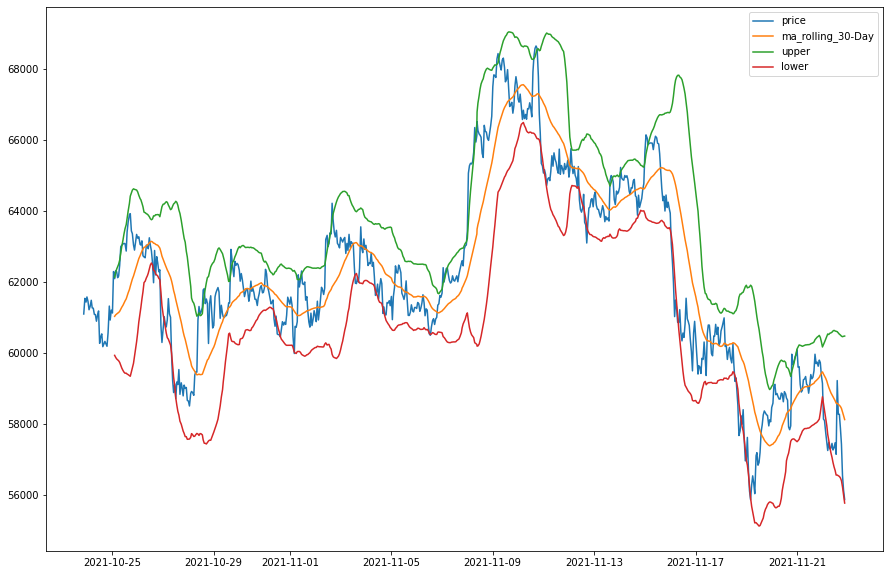

In [72]:
plt.figure(figsize=(15,10))

plt.plot(cg_df[['price','ma_rolling_30-Day','upper','lower']])
plt.legend(['price','ma_rolling_30-Day','upper','lower']);